In [1]:
from kalkulator import Kalkulator
from mytypes import *


In [2]:
kredyt1=Kalkulator(kwota_kredytu=400000,ilosc_lat=30,stopa_procentowa=6.6,rodzaj_rat=RodzajRat.rowne,wskaznikBGK=7.14)

In [3]:
df=kredyt1.harmonogram_to_DF()
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,400000.00,354.64,2200.00,0.0,2554.64,399645.36
1,2,399645.36,356.59,2198.05,0.0,2554.64,399288.77
2,3,399288.77,358.55,2196.09,0.0,2554.64,398930.22
3,4,398930.22,360.52,2194.12,0.0,2554.64,398569.70
4,5,398569.70,362.51,2192.13,0.0,2554.64,398207.19
...,...,...,...,...,...,...,...
354,355,15031.79,2471.97,82.67,0.0,2554.64,12559.82
355,356,12559.82,2485.56,69.08,0.0,2554.64,10074.26
356,357,10074.26,2499.23,55.41,0.0,2554.64,7575.03
357,358,7575.03,2512.98,41.66,0.0,2554.64,5062.05


In [5]:
import math
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
# show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
# show.reset_index(inplace=True)
show = df[df['Numer raty']%12==0]


Text(0, 0.5, 'Number of Customers')

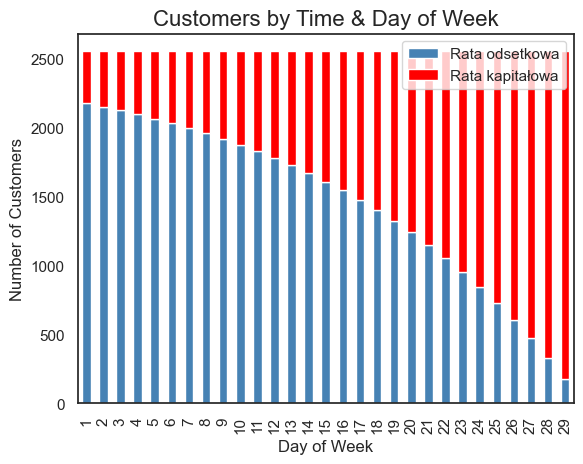

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Customers by Time & Day of Week', fontsize=16)

#add axis titles
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')

#rotate x-axis labels
# plt.xticks(rotation=45)

In [6]:
kredyt2=Kalkulator(kwota_kredytu=400000,ilosc_rat=240,stopa_procentowa=8.46,rodzaj_rat=RodzajRat.malejace)
df=kredyt2.harmonogram_to_DF()
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
show.reset_index(inplace=True)

<Axes: xlabel='rok'>

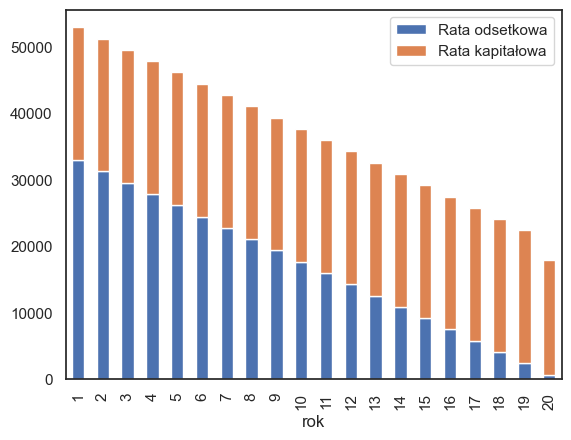

In [7]:
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True)


In [8]:
gov=8.46
ile=30
bgk=gov*0.9
kredyt3=Kalkulator(kwota_kredytu=550000,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.malejace,wskaznikBGK=bgk)
df=kredyt3.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']


In [9]:
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,550000.00,1527.78,3877.50,2573.08,5405.28,548472.22,1304.42,2832.20
1,2,548472.22,1527.78,3866.73,2573.08,5394.51,546944.44,1293.65,2821.43
2,3,546944.44,1527.78,3855.96,2573.08,5383.74,545416.66,1282.88,2810.66
3,4,545416.66,1527.78,3845.19,2573.08,5372.97,543888.88,1272.11,2799.89
4,5,543888.88,1527.78,3834.42,2573.08,5362.20,542361.10,1261.34,2789.12
...,...,...,...,...,...,...,...,...,...
354,355,9165.88,1527.78,64.62,0.00,1592.40,7638.10,64.62,1592.40
355,356,7638.10,1527.78,53.85,0.00,1581.63,6110.32,53.85,1581.63
356,357,6110.32,1527.78,43.08,0.00,1570.86,4582.54,43.08,1570.86
357,358,4582.54,1527.78,32.31,0.00,1560.09,3054.76,32.31,1560.09


In [10]:
round(df['Dopłata'].sum())

308770

<Axes: xlabel='Numer raty'>

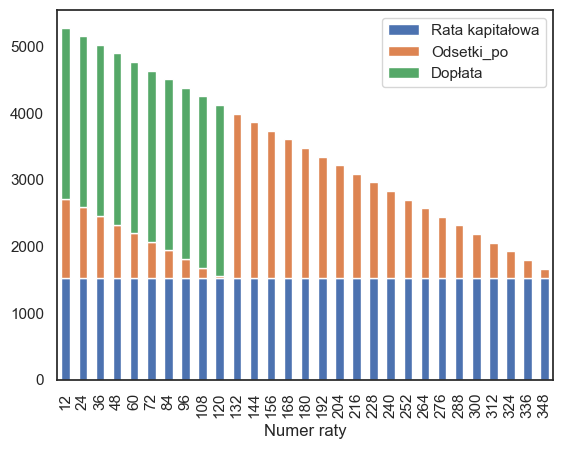

In [11]:
grudzien = df[df['Numer raty']%12==0]
grudzien.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True)

In [12]:
po=df.loc[120,'Kapitał na początku okresu']
ile=20
gov=8.46
kredyt3po=Kalkulator(kwota_kredytu=po,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.rowne)

dfpo=kredyt3po.harmonogram_to_DF()
display(dfpo['Rata odsetkowa'].sum())
dfpo

394768.49000000005

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,366666.40,587.74,2585.00,0.0,3172.74,366078.66
1,2,366078.66,591.89,2580.85,0.0,3172.74,365486.77
2,3,365486.77,596.06,2576.68,0.0,3172.74,364890.71
3,4,364890.71,600.26,2572.48,0.0,3172.74,364290.45
4,5,364290.45,604.49,2568.25,0.0,3172.74,363685.96
...,...,...,...,...,...,...,...
234,235,18574.94,3041.79,130.95,0.0,3172.74,15533.15
235,236,15533.15,3063.23,109.51,0.0,3172.74,12469.92
236,237,12469.92,3084.83,87.91,0.0,3172.74,9385.09
237,238,9385.09,3106.58,66.16,0.0,3172.74,6278.51
